In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import sklearn
from sklearn.model_selection import train_test_split


### Train-Test Split

In [52]:
data = pd.read_csv('train.csv')

X = data.drop(columns=['hazardous'])
Y = data['hazardous']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42
)

print(X.shape,Y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4034, 23) (4034,)
(3227, 23) (3227,)
(807, 23) (807,)


### Getting to know the data better 

In [53]:
#Provides a concise summary, including the number of entries, column names, and data types
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3227 entries, 3670 to 3174
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3227 non-null   int64  
 1   epoch_date_close_approach     2337 non-null   float64
 2   relative_velocity_km_per_sec  2287 non-null   object 
 3   relative_velocity_km_per_hr   2151 non-null   float64
 4   miles_per_hour                2628 non-null   float64
 5   miss_dist_astronomical        2798 non-null   float64
 6   miss_dist_lunar               2451 non-null   float64
 7   miss_dist_kilometers          2242 non-null   float64
 8   miss_dist_miles               2761 non-null   float64
 9   jupiter_tisserand_invariant   2023 non-null   float64
 10  epoch_osculation              2136 non-null   float64
 11  semi_major_axis               2384 non-null   float64
 12  asc_node_longitude            2443 non-null   float64
 13  perih

In [54]:
print("Let us look at percentage of missing values per column")
# 1. Identify and Quantify
missing_counts = X_train.isnull().sum()
missing_percentage = (X_train.isnull().mean() * 100)

# Combine into a summary table for easy viewing
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage (%)': missing_percentage,
    'dtype': X_train.dtypes
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

Let us look at percentage of missing values per column
                              Missing Count  Percentage (%)    dtype
orbit_uncertainity                     1275       39.510381   object
jupiter_tisserand_invariant            1204       37.310195  float64
perihelion_time                        1115       34.552216  float64
mean_motion                            1113       34.490239  float64
approach_month                         1092       33.839479  float64
epoch_osculation                       1091       33.808491  float64
relative_velocity_km_per_hr            1076       33.343663  float64
miss_dist_kilometers                    985       30.523706  float64
relative_velocity_km_per_sec            940       29.129222   object
epoch_date_close_approach               890       27.579795  float64
semi_major_axis                         843       26.123334  float64
perihelion_arg                          824       25.534552  float64
asc_node_longitude                      784     

In [55]:
print("Let us look at percentage of missing values test data per column")
# 1. Identify and Quantify
missing_counts = X_test.isnull().sum()
missing_percentage = (X_test.isnull().mean() * 100)

# Combine into a summary table for easy viewing
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage (%)': missing_percentage,
    'dtype': X_test.dtypes
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

Let us look at percentage of missing values test data per column
                              Missing Count  Percentage (%)    dtype
jupiter_tisserand_invariant             324       40.148699  float64
orbit_uncertainity                      295       36.555143   object
epoch_osculation                        265       32.837670  float64
relative_velocity_km_per_hr             259       32.094176  float64
approach_month                          258       31.970260  float64
perihelion_time                         252       31.226766  float64
relative_velocity_km_per_sec            248       30.731103   object
mean_motion                             243       30.111524  float64
miss_dist_kilometers                    234       28.996283  float64
epoch_date_close_approach               228       28.252788  float64
semi_major_axis                         219       27.137546  float64
miss_dist_lunar                         208       25.774473  float64
perihelion_arg                        

1. also miss_dist_astronomical, miss_dist_miles, miss_dist_lunar, miss_dist_kilometers tell about same thing. I am planning to use ***miss_dist_astronomical*** bcz it is only 13.38% empty and otheres are too much empty. if needed i will conver this to other units.
2. miles_per_hour and relative_velocity_km_per_hr tell the same thing. I am planning to use ***miles_per_hour*** as it is only 19.826518% empty copmare to 32% of relative_velocity_km_per_hr. if needed i will conver this to other units
Now let us drop these columns. 

In [56]:
columns_to_drop_ = ['miss_dist_miles', 'miss_dist_kilometers', 'miss_dist_lunar', 'relative_velocity_km_per_hr' ]
X_train =  X_train.drop(columns = columns_to_drop_)


missing_counts_1 = X_train.isnull().sum()
missing_percentage_1 = (X_train.isnull().mean() * 100)

# Combine into a summary table for easy viewing
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts_1,
    'Percentage (%)': missing_percentage_1,
    'dtype': X_train.dtypes
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

                              Missing Count  Percentage (%)    dtype
orbit_uncertainity                     1275       39.510381   object
jupiter_tisserand_invariant            1204       37.310195  float64
perihelion_time                        1115       34.552216  float64
mean_motion                            1113       34.490239  float64
approach_month                         1092       33.839479  float64
epoch_osculation                       1091       33.808491  float64
relative_velocity_km_per_sec            940       29.129222   object
epoch_date_close_approach               890       27.579795  float64
semi_major_axis                         843       26.123334  float64
perihelion_arg                          824       25.534552  float64
asc_node_longitude                      784       24.295011  float64
mean_anomaly                            648       20.080570  float64
miles_per_hour                          599       18.562132  float64
aphelion_dist                     

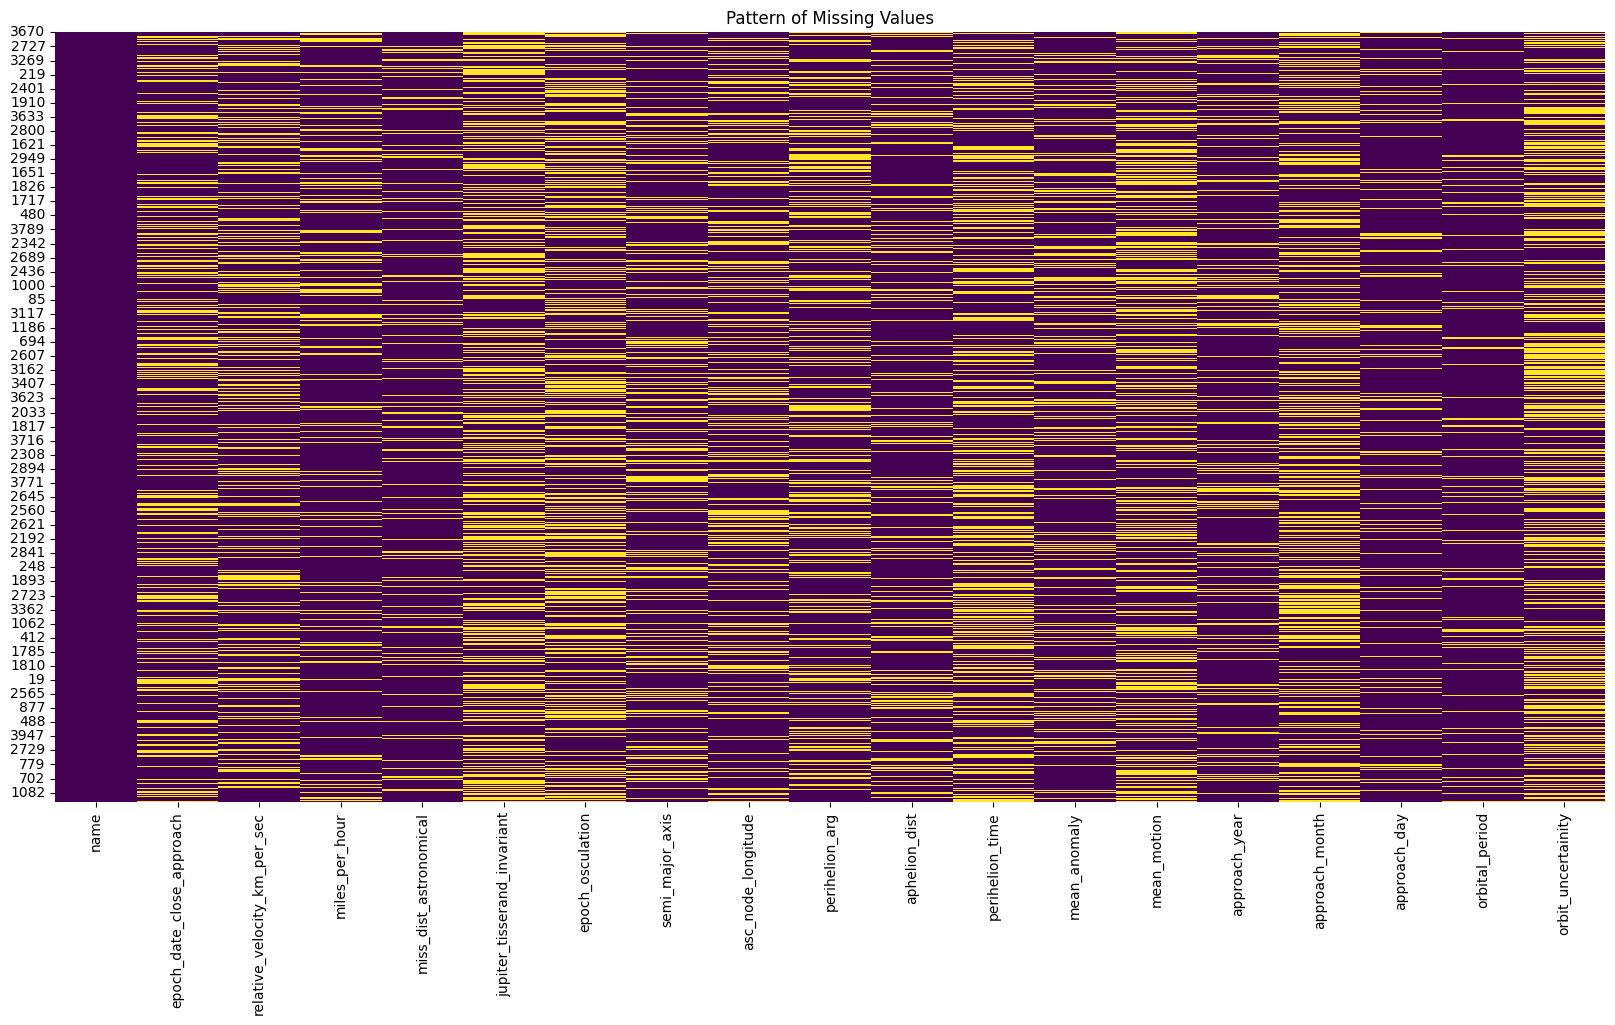

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.title("Pattern of Missing Values")
plt.show()

Now we have to fill these empty values. 
1. Strong Physics Relationships 
- mean_motion ↔ semi_major_axis (Kepler's 3rd Law)
- aphelion_dist ↔ semi_major_axis + eccentricity
- jupiter_tisserand_invariant (from semi_major_axis + eccentricity)
2. Moderate Physics Relationships 
- Angular parameters (asc_node_longitude, perihelion_arg, mean_anomaly) - use circular statistics
- miss_dist_astronomical - might correlate with orbital characteristics
3. Temporal/Metadata 
- perihelion_time, epoch_osculation, epoch_date_close_approach - temporal relationships
- approach_year, approach_month, approach_day - observation metadata
4. Categorical 
- orbit_uncertainity
- orbital_period
- relative_velocity_km_per_sec - statistical methods


My stratergy to fill the Data: 
#### Physics-Based
1. Semi Major Axis - Mean Motion (Kepler's 3rd Law): If you have one, you can calculate the other exactly
2. Aphelion - Semi Major Axis - Eccentricity:
a = (aphelion + perihelion) / 2
e = (aphelion / a) - 1
3. Jupiter Tisserand Invariant:
J = (a_jupiter/a) + 2√(a/a_jupiter × (1-e²)) × cos(i)
we dont have inclination (i). We can assume i = 0 as most NEOs have low inclination. We can find this only if we have semi_major_axis + eccentricity. else we can use MICE

#### Angular Parameters (Circular Statistics) 
4. Asc Node Longitude, Perihelion Arg, Mean Anomaly:
- These are angular/cyclic variables
- Physics doesn't help much here - these vary widely for NEOs
- Use circular mean

#### Temporal Metadata
5. Epoch Osculation, Perihelion Time, Epoch Date Close Approach:
- These are observation timestamps, not orbital properties

6. Approach Year/Month/Day:
- Pure metadata - when the asteroid was observed approaching Earth

#### Distance & Velocity (Independent Measurements)
7. Miss Distance (Astronomical)
- This is the closest approach distance - varies wildly between asteroids
- No physics formula to derive it from orbital elements alone
- MICE (correlates with velocity, orbital period)


8. Miles per Hour
- Relative velocity at closest approach
- Depends on both Earth's and asteroid's velocity vectors
- Can't derive from orbital elements alone (need trajectory)
- MICE (correlates with semi_major_axis, miss_distance)

#### Categorical Variables
9. Relative Velocity km per sec:
- i think if we have miles_per_hour, you can categorize it

10. Orbital Period
- Categorical version of the actual orbital period

11. Orbit Uncertainty
- No way to derive this
- New "Unknown" category as missing info might be usefull


In [57]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True)*100)

hazardous
0    2886
1     341
Name: count, dtype: int64
hazardous
0    89.43291
1    10.56709
Name: proportion, dtype: float64


In [58]:
print(y_test.value_counts())
print(y_test.value_counts(normalize=True)*100)

hazardous
0    712
1     95
Name: count, dtype: int64
hazardous
0    88.228005
1    11.771995
Name: proportion, dtype: float64


Let us first divide our data

In [59]:
columns_to_drop = ['relative_velocity_km_per_sec', 'orbit_uncertainity', 'orbital_period']
X_train_num =  X_train.drop(columns = columns_to_drop)
X_train_obj = X_train.select_dtypes(include=['object'])
print("only data with numbers")
print(X_train_num.info())
print("only data with objects")
print(X_train_obj.info())

only data with numbers
<class 'pandas.core.frame.DataFrame'>
Index: 3227 entries, 3670 to 3174
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         3227 non-null   int64  
 1   epoch_date_close_approach    2337 non-null   float64
 2   miles_per_hour               2628 non-null   float64
 3   miss_dist_astronomical       2798 non-null   float64
 4   jupiter_tisserand_invariant  2023 non-null   float64
 5   epoch_osculation             2136 non-null   float64
 6   semi_major_axis              2384 non-null   float64
 7   asc_node_longitude           2443 non-null   float64
 8   perihelion_arg               2403 non-null   float64
 9   aphelion_dist                2653 non-null   float64
 10  perihelion_time              2112 non-null   float64
 11  mean_anomaly                 2579 non-null   float64
 12  mean_motion                  2114 non-null   float64
 1

Now let us also look at skewness of the data

In [60]:
skewness_vals = X_train_num.skew().sort_values(ascending=False)

# Flag features that need transformation (> 0.5 or < -0.5)
transform_needed = skewness_vals
print("output of the .skew")
print(transform_needed)

output of the .skew
aphelion_dist                  1.145447
miles_per_hour                 0.958746
semi_major_axis                0.849941
mean_motion                    0.414952
jupiter_tisserand_invariant    0.182182
asc_node_longitude             0.049193
approach_day                   0.005987
name                          -0.031714
approach_month                -0.038135
perihelion_arg                -0.055968
miss_dist_astronomical        -0.089248
mean_anomaly                  -0.089886
epoch_date_close_approach     -0.315297
approach_year                 -0.320201
perihelion_time               -3.780259
epoch_osculation              -3.851664
dtype: float64


Now i am going to imputate the data without understanding the physics and just directly use MICE

In [ ]:
train_mice_obj = X_train_obj.copy().reset_index(drop=True)

for col in train_mice_obj.select_dtypes(include=['object']).columns:
    train_mice_obj[col] = train_mice_obj[col].astype('category')

kds = mf.ImputationKernel(
    train_mice_obj,
    save_all_iterations_data=True,
    random_state=42,
)

kds.mice(iterations=5)
df_imputed_obj = kds.complete_data()

print(df_imputed_obj.isnull().sum())
#initially i tried to use only train_mice_obj = X_train_obj.copy() 
# but this doesnt work bczz we want continuous index and bcz we get 
# it from train test split it is not continuous

relative_velocity_km_per_sec    0
orbital_period                  0
orbit_uncertainity              0
dtype: int64


In [62]:
train_mice_num = X_train_num.copy().reset_index(drop=True)

kds = mf.ImputationKernel(
    train_mice_num,
    save_all_iterations_data=True,
    random_state=42,
)

kds.mice(iterations=5)
df_imputed_num = kds.complete_data()

print(df_imputed_num.isnull().sum())

name                           0
epoch_date_close_approach      0
miles_per_hour                 0
miss_dist_astronomical         0
jupiter_tisserand_invariant    0
epoch_osculation               0
semi_major_axis                0
asc_node_longitude             0
perihelion_arg                 0
aphelion_dist                  0
perihelion_time                0
mean_anomaly                   0
mean_motion                    0
approach_year                  0
approach_month                 0
approach_day                   0
dtype: int64


Now i am planning to impute and understand the data with physics laws

# footnote
right now i am using mice to fill the data but what if it is wrong that is why i am getting these different features. Later on we will try building something without filling the data.

In [64]:
# 1. First, handle the Categorical "Objects" (Phase 3.1)
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_imputed_obj['orbital_period_num'] = df_imputed_obj['orbital_period'].map(ordinal_mapping).fillna(1)
df_imputed_obj['orbit_uncertainity_num'] = df_imputed_obj['orbit_uncertainity'].map(ordinal_mapping).fillna(1)
